In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import tensorflow as tf
import os
from keras.preprocessing.image import ImageDataGenerator as ImgDataGen
from tensorflow.keras.applications import InceptionV3
from keras.models import Sequential
from keras.layers import GlobalAvgPool2D as GAP, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [99]:
agri_dir = '../Desktop/Agricultural-crops/'
classes = sorted(os.listdir(agri_dir))

In [100]:
gen = ImgDataGen(rescale=1/255, rotation_range=20, horizontal_flip=True, 
                 validation_split=0.1)

# Load Data 
train_ds = gen.flow_from_directory(agri_dir, 
                                   class_mode='binary', shuffle=True, 
                                   batch_size=32, target_size=(256,256), 
                                   subset='training')
valid_ds = gen.flow_from_directory(agri_dir, 
                                   class_mode='binary', shuffle=True, 
                                   batch_size=32, target_size=(256,256), 
                                   subset='validation')

Found 757 images belonging to 30 classes.
Found 72 images belonging to 30 classes.


In [79]:
# Load Pretrained Model
base_model = InceptionV3(include_top=False, input_shape=(256,256,3))
# other models : ResNet50V2, InceptionV1, InceptionV2, Xception

# Freeze Weights
base_model.trainable = False

# Model Architecture
model = Sequential([
    base_model,
    GAP(),
    Dense(256, activation='relu', kernel_initializer='he_normal'),
    Dropout(0.4),
    Dense(len(labels), activation='softmax')
], name="Inception-TL")

# Compile Model 
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Callbacks 
cbs = [EarlyStopping(patience=3, restore_best_weights=True), 
       ModelCheckpoint("Inception-TL.h5", save_best_only=True)]

# Model Training
history = model.fit(train_ds, validation_data=valid_ds, 
                    epochs=50, callbacks=cbs)

87910968/87910968 [==============================] - 65s 1us/step
Epoch 1/50
24/24 [==============================] - 127s 5s/step - loss: 3.1684 - accuracy: 0.1638 - val_loss: 2.4852 - val_accuracy: 0.4028
Epoch 2/50
24/24 [==============================] - 110s 5s/step - loss: 2.2227 - accuracy: 0.3923 - val_loss: 2.0480 - val_accuracy: 0.3889
Epoch 3/50
24/24 [==============================] - 116s 5s/step - loss: 1.6523 - accuracy: 0.5337 - val_loss: 1.6592 - val_accuracy: 0.6250
Epoch 4/50
24/24 [==============================] - 109s 5s/step - loss: 1.4374 - accuracy: 0.5865 - val_loss: 1.5458 - val_accuracy: 0.5556
Epoch 5/50
24/24 [==============================] - 111s 5s/step - loss: 1.2351 - accuracy: 0.6328 - val_loss: 1.4430 - val_accuracy: 0.5972
Epoch 6/50
24/24 [==============================] - 111s 5s/step - loss: 1.0872 - accuracy: 0.6869 - val_loss: 1.3804 - val_accuracy: 0.6111
Epoch 7/50
24/24 [==============================] - 110s 5s/step - loss: 0.9780 - accura

In [101]:
model = load_model('./Inception-TL.h5')
model.summary()

Model: "Inception-TL"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 30)                7710      
                                                                 
Total params: 22,335,038
Trainable params: 532,254
Non-trainable params: 21,802,784
____________________________________

Text(0.5, 1.0, 'Accuracy Vs Epoch')

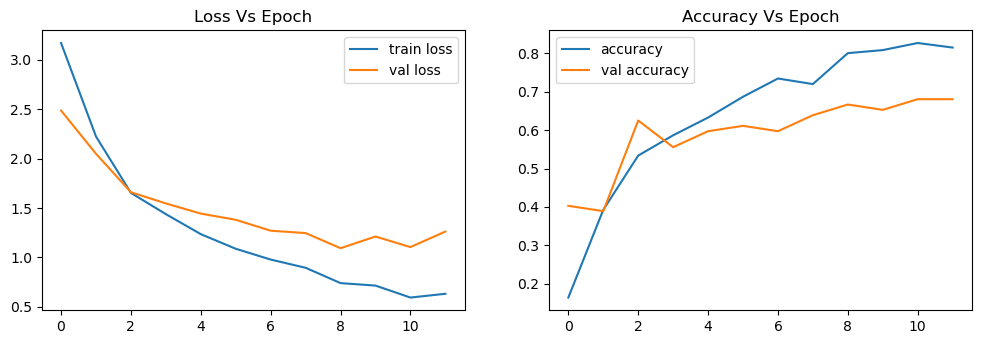

In [102]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss Vs Epoch')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.title('Accuracy Vs Epoch')

1/1 [==============================] - 0s 63ms/step


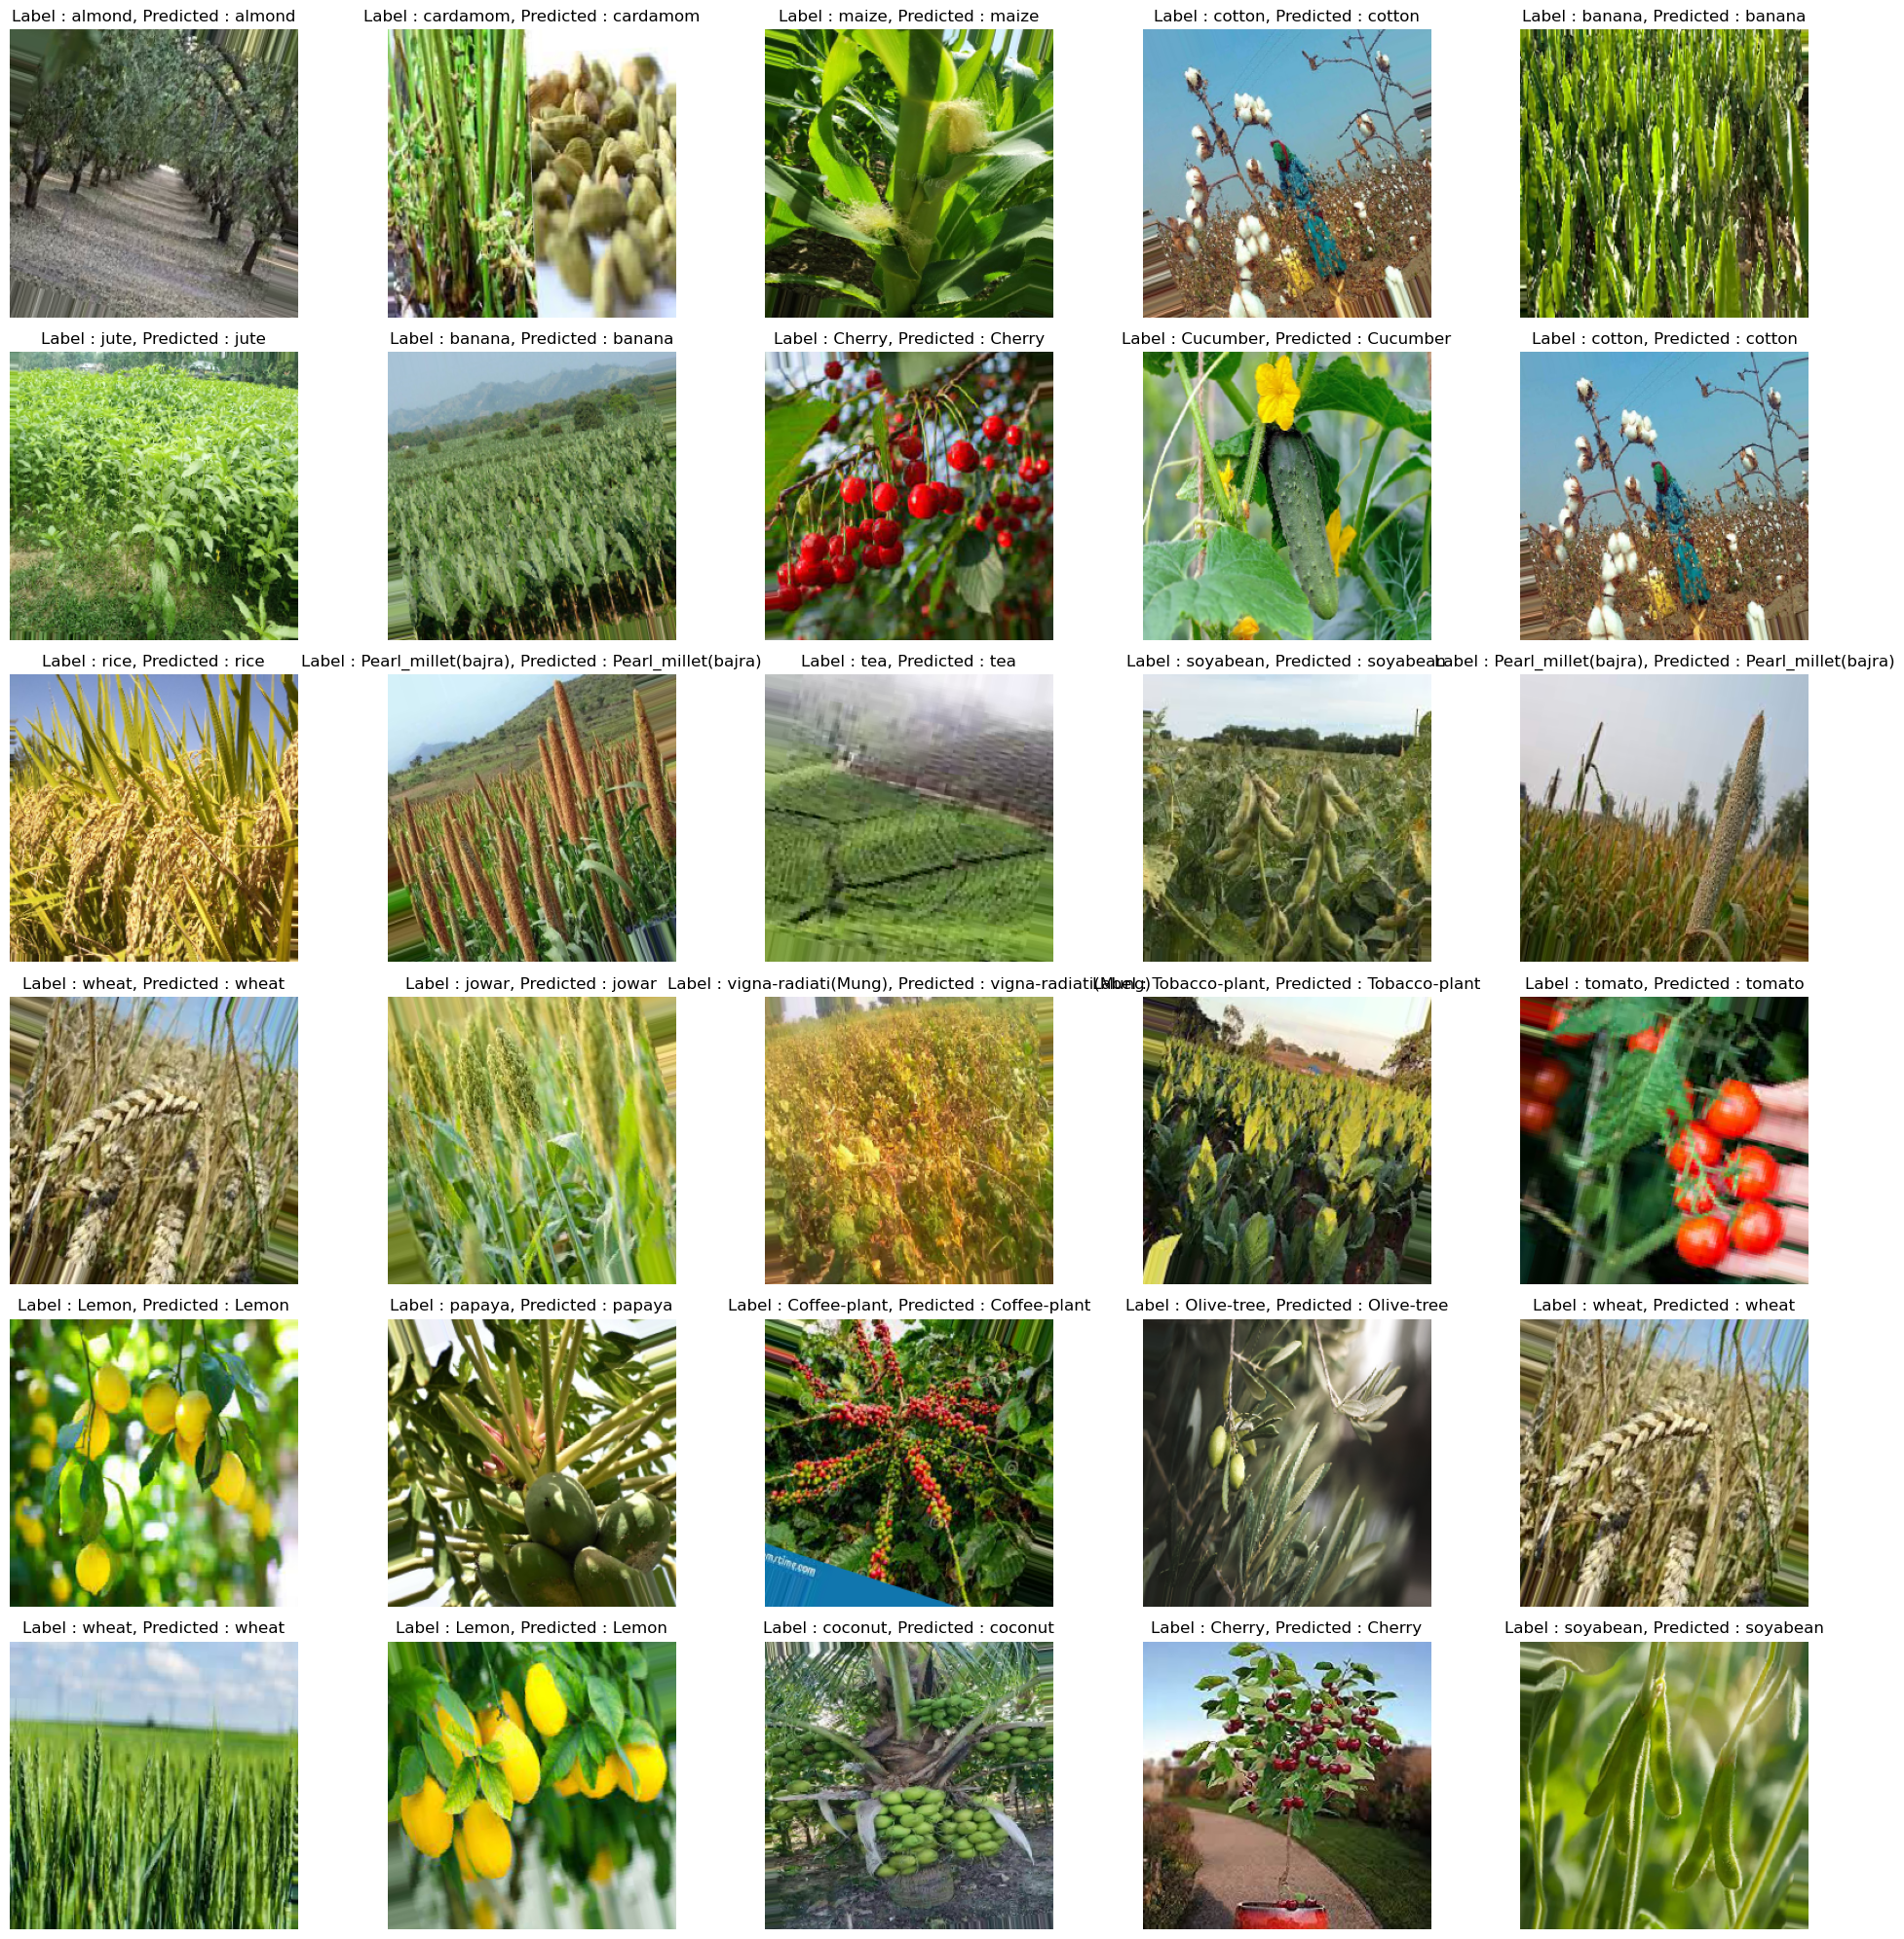

In [104]:
i = 1
plt.figure(figsize=(20, 20))
for images, labels in valid_ds:
    id = np.random.randint(len(images))
    image, label = images[id], labels[id]
    pred_label = np.argmax(model.predict(image.reshape(-1, 256, 256, 3)))

    plt.subplot(6, 5, i)
    plt.imshow(image)
    plt.title(f"Label : {classes[int(label)]}, Predicted : {classes[int(label)]}")
    plt.axis('off')

    i += 1
    if i >= len(classes) + 1:
        break
        
plt.tight_layout()
plt.show()